In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Mix_density = np.array([0.993861,0.993770,0.993682,0.993591,0.993503,0.993411,0.993320,0.993227,0.993135,0.993042,0.992947,0.992856,0.992761,0.992667,0.992571,0.992474,0.992378,0.992281,0.992183,0.992084,0.991984,0.991877,0.991709,0.991581,0.991481,0.991382,0.991279,0.991179,0.991078,0.990976,0.990873,0.990770,0.990667,0.990564,0.990459,0.990356,0.990251,0.990145,0.990039,0.989933,0.989827])
Temperature = np.array([35.996,36.254,36.504,36.754,37.004,37.254,37.504,37.754,38.004,38.254,38.504,38.754,39.004,39.254,39.504,39.755,40.004,40.254,40.503,40.754,41.004,41.254,41.504,41.754,42.004,42.254,42.504,42.754,43.004,43.254,43.504,43.754,44.004,44.254,44.503,44.754,45.004,45.254,45.504,45.754,46.003])

a_CIPM = np.array([-3.983035, 301.797, 522528.9, 69.34881, 999.974950/1000])
a_SB = np.array([9.9983952*10**2,1.6952577*10,-7.9905127*10**(-3),-4.6241757*10**(-5),1.584601*10**(-7),-2.8103006*10**(-10)])/1000
b = 1.6887236*10**(-2)

water_density_SB = 0
for i in range(0, 5):
    water_density_SB += a_SB[i]*Temperature**i/(1+b*Temperature)


water_density_CIPM = a_CIPM[-1]*(1-(((Temperature+a_CIPM[0])**2)*(Temperature+a_CIPM[1]))/(a_CIPM[2]*(Temperature+a_CIPM[3])))

wL = 0.003/(1.003)
Spec_vol_sample = 1/Mix_density

Spec_vol_water_SB = 1/water_density_SB
Spec_vol_water_CIPM = 1/water_density_CIPM

Spec_vol_DPPC_SB = (Spec_vol_sample - (1 - wL) * Spec_vol_water_SB)/wL
Spec_vol_DPPC_CIPM = (Spec_vol_sample - (1 - wL) * Spec_vol_water_CIPM)/wL

In [3]:
# Let us compute dV/dT using forward finite differences to compute alpha

alpha_SB = np.empty(len(Temperature))
alpha_CIPM = np.empty(len(alpha_SB))
for i in range(0,len(alpha_SB)-1):
    alpha_SB[i] = ((Spec_vol_DPPC_SB[i+1]-Spec_vol_DPPC_SB[i])/(Temperature[i+1]-Temperature[i]))/Spec_vol_DPPC_SB[i]
    alpha_CIPM[i] = ((Spec_vol_DPPC_CIPM[i+1]-Spec_vol_DPPC_CIPM[i])/(Temperature[i+1]-Temperature[i]))/Spec_vol_DPPC_CIPM[i]

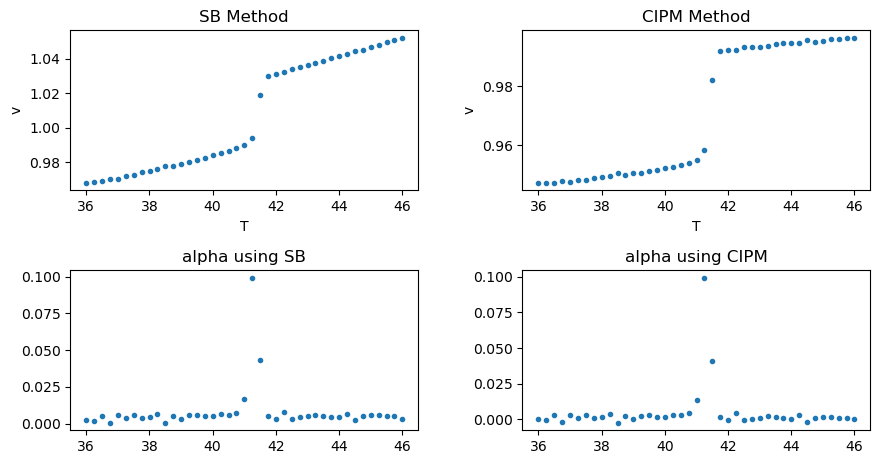

In [5]:
fig, ax = plt.subplots(2,2,figsize=(10, 5))

ax[0,0].plot(Temperature, Spec_vol_DPPC_SB,'.')
ax[0,1].plot(Temperature,Spec_vol_DPPC_CIPM,'.')
ax[1,0].plot(Temperature,alpha_SB,'.')
ax[1,1].plot(Temperature,alpha_CIPM,'.')

ax[0,0].set_xlabel('T')
ax[0,1].set_xlabel('T')
ax[0,0].set_ylabel('v')
ax[0,1].set_ylabel('v')
ax[0,0].set_title('SB Method')
ax[0,1].set_title('CIPM Method')
ax[1,0].set_title('alpha using SB')
ax[1,1].set_title('alpha using CIPM')
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.5)

In [5]:
np.polyfit(Temperature,np.log(Spec_vol_DPPC_SB),1)

array([ 0.01013566, -0.4092921 ])

In [6]:
np.polyfit(Temperature,np.log(Spec_vol_DPPC_CIPM),1)

array([ 0.00695888, -0.31549442])

In [7]:
M = 734
Na = 6.02214076*10**(23)

vm = Spec_vol_DPPC_SB*M/Na*10**(24)
vm

array([1179.8423980753914, 1180.6773713857792, 1181.2213998354723,
       1182.8160879025502, 1182.985852681164, 1184.6212748691134,
       1185.6590859959633, 1187.3390788561503, 1188.423058706402,
       1189.7380409443813, 1191.6983499579715, 1191.8249295604885,
       1193.425313712227, 1194.433511112548, 1196.090908762537,
       1197.8317522063694, 1199.289356415304, 1200.8320737185636,
       1202.7696701986908, 1204.6366811734456, 1206.9005428132953,
       1211.8919339814884, 1241.9865737047826, 1255.3475232778476,
       1256.9369685885758, 1257.9428443640509, 1260.4390973256554,
       1261.5239684385442, 1262.8568690060056, 1264.4387507263568,
       1266.270563915431, 1267.93813190461, 1269.4421409234167,
       1270.7832733074558, 1272.9597225526345, 1273.8105614460185,
       1275.4984119567014, 1277.4420755720748, 1279.2267442008442,
       1280.8530781177817, 1282.4925212100518], dtype=object)